## Introduction to SHAPley
SHAP (SHapley Additive exPlanations) values are a game theory-based approach for explaining the output of machine learning models. Developed by Lloyd Shapley, these values provide insights into how each feature contributes to the prediction of a particular instance. This explanation method is particularly useful for complex models like ensemble trees and deep neural networks.

### Why Use SHAP Values?
- **Transparency:** Helps in understanding model predictions at a granular level.
- **Fairness:** Identifies bias in model predictions by analyzing the impact of inputs.
- **Debugging:** Assists in identifying errors in model training and data preprocessing.

### Calculating SHAP Values

The Shapley value is a concept from cooperative game theory that allocates gains and costs to players depending on their contribution to the total payout. In the context of SHAP (SHapley Additive exPlanations), these values provide a way to fairly distribute the 'payout' (the prediction) among the 'players' (the features).

For a given prediction, the Shapley value of a feature is the average marginal contribution of a feature value across all possible combinations. The formula to calculate the Shapley value for the `i-th` feature is given by:

$$
\phi_i(f) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! (|N| - |S| - 1)!}{|N|!} [f(S \cup \{i\}) - f(S)]
$$

Where:
- \( \phi_i(f) \) is the Shapley value for feature \( i \).
- \( N \) is the set of all features.
- \( S \) is a subset of features excluding \( i \).
- \( |S| \) is the number of features in subset \( S \).
- \( |N| \) is the total number of features.
- \( f(S) \) is the prediction model's output when only the features in set \( S \) are used.
- \( f(S \cup \{i\}) \) is the model's output when the features in set \( S \) are used together with feature \( i \).

The equation sums over all possible subsets of features that do not include feature \( i \), weighting the contribution of feature \( i \) to the difference in prediction with and without feature \( i \) in the set.


### Installation
To work with SHAP values, you need to install the SHAP library. You can install it via pip:

```bash
pip install shap```

In [19]:
!pip install shap

### Import Libraries and Load Data

In this section, we begin by importing the necessary Python libraries: `numpy` and `pandas`. These libraries provide tools for numerical operations and data manipulation, respectively.

Following the imports, we load a dataset named `study_performance.csv` from a predefined path. This dataset contains information about study performance, which we will utilize for further analysis.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/study_performance.csv'

# Load the dataset
data = pd.read_csv(file_path)

To get a quick overview of the recent entries in our dataset, we use the `tail()` method on our DataFrame. This method defaults to displaying the last five rows, providing a snapshot of the data to ensure it has loaded correctly and to understand its structure before proceeding with further analysis.

In [21]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [22]:
data.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


The `describe()` method is utilized here to generate a statistical summary of the dataset. This method provides a quick look at the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. It includes statistics like mean, standard deviation, minimum, and maximum values, along with the quartiles for each numeric column. This helps in identifying trends, anomalies, or further areas of investigation in the data.

In [23]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The table displayed provides the descriptive statistics for the math, reading, and writing scores of the dataset. Here are some insights from the summary:

- **Count**: Each score category has data for 1000 entries, indicating a complete dataset with no missing values in these fields.
- **Mean**: The average scores are approximately 66 for math, 69 for reading, and 68 for writing, suggesting a generally higher performance in reading.
- **Standard Deviation**: The scores show similar variability with standard deviations around 15, indicating a moderate spread around the mean.
- **Minimum and Maximum**: Scores range from 0 to 100, with the minimum scores showing particularly low values in math, which may warrant further investigation for potential entry errors or outliers.
- **Quartiles**: The median scores are closely aligned with the means, and the IQR (Interquartile Range) suggests a consistent performance distribution across students.

These statistics provide a foundational understanding of the dataset's score distribution and are crucial for guiding further data exploration and analysis.


### Encoding Categorical Features

For the purpose of preparing our dataset for machine learning algorithms, it is essential to convert categorical features into numerical values. This is because most machine learning models cannot handle categorical data directly.

In this section, we use the `LabelEncoder` from Scikit-learn's preprocessing module to encode the categorical variables in our dataset. The features we are transforming include:
- `gender`
- `race_ethnicity`
- `parental_level_of_education`
- `lunch`
- `test_preparation_course`

Each unique category within these features will be assigned a numeric value, effectively transforming them into a format that can be efficiently processed by machine learning algorithms. We update each column in the `data` DataFrame with its encoded version.


In [24]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'data' with columns 'Colour', 'Make', and other features
categorical_features = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the categorical features and create new columns
data['gender'] = label_encoder.fit_transform(data['gender'])
data['race_ethnicity'] = label_encoder.fit_transform(data['race_ethnicity'])
data['parental_level_of_education'] = label_encoder.fit_transform(data['parental_level_of_education'])
data['lunch'] = label_encoder.fit_transform(data['lunch'])
data['test_preparation_course'] = label_encoder.fit_transform(data['test_preparation_course'])

In [25]:
data.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77
999,0,3,4,0,1,77,86,86


After applying label encoding to the categorical features in our dataset, here is a preview of the last five entries. This snapshot illustrates how categorical data like gender, race ethnicity, parental level of education, lunch, and test preparation course have been transformed from their original string representations into numerical codes:

- **Gender**, **Race Ethnicity**, **Parental Level of Education**, **Lunch**, and **Test Preparation Course** columns now contain numerical values representing categories.
- **Math Score**, **Reading Score**, and **Writing Score** remain unchanged as they are already in numeric format.

This conversion facilitates the application of statistical and machine learning techniques, which require numerical input. Observing the tail of the dataset ensures that our encoding process has been implemented correctly and the dataset is ready for further analysis or modeling.

### Splitting the Dataset into Training and Test Sets

In this section, we prepare our dataset for model training by splitting it into independent (`X`) and dependent (`y`) variables, with `math_score` serving as the dependent variable. This separation allows us to isolate the feature we are attempting to predict from the rest of the dataset.

Once separated, we employ Scikit-learn's `train_test_split` function to divide the dataset into training and test sets. We allocate 20% of the data to the test set and retain the remaining 80% for training. This split is controlled by a `random_state` for reproducibility of the results:

- `X_train` and `y_train` will be used for training the model.
- `X_test` and `y_test` will be used for validating the model's performance.

This step is crucial for building robust machine learning models, as it helps in assessing the model’s ability to generalize to new, unseen data.


In [26]:
X = data.drop("math_score", axis=1)
y = data["math_score"]

In [27]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the Linear Regression Model

In this section, we shift our approach to a simpler yet powerful algorithm: Linear Regression. Linear Regression is a foundational statistical method in machine learning, used for predicting numeric outcomes based on linear relationships between independent and dependent variables.

We instantiate and train a `LinearRegression` model using Scikit-learn. This process involves:
- **Instantiating the model**: A new `LinearRegression` object is created.
- **Training the model**: The model is fitted to the training data (`X_train` and `y_train`). This step involves calculating the best-fit line to minimize the residuals between the predicted and actual values in the training dataset.

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

### Evaluating Model Performance

After training our RandomForestRegressor model, we evaluate its performance on the test set. This evaluation will help us understand how well our model is predicting the math scores. We use the following metrics from Scikit-learn's metrics module for this purpose:

- **Mean Absolute Error (MAE)**: Represents the average absolute difference between the predicted values and the actual values. It gives an idea of how big an error we can expect from the forecast on average.
- **Mean Squared Error (MSE)**: Represents the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
- **Root Mean Squared Error (RMSE)**: This is the square root of the MSE and provides a measure of the magnitude of the error in the same units as the output variable.
- **R-squared (R^2)**: Provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of variance explained.

The printed outputs give us numeric values that quantify the model's accuracy and performance. These metrics are crucial for understanding the effectiveness of the model and guiding potential improvements.

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 4.1301450780040545
R-squared: 0.8838026201112223


Following the training of our Linear Regression model, we proceed to assess its performance on the test data. The model's effectiveness is evaluated using the following metrics:

- **Mean Absolute Error (MAE)**: The MAE represents the average absolute difference between the predicted values and the actual values. For this model, the MAE is approximately 4.13, indicating that, on average, the model's predictions are within 4.13 points of the actual math scores. This lower MAE compared to previous models indicates a more accurate set of predictions.

- **R-squared (R²)**: The R² metric, showing a value of 0.8838, measures the proportion of variance in the dependent variable (math scores) that can be explained by the independent variables in the model. An R² of over 88% signifies that the model explains a large portion of the variability in the test data, highlighting its strong predictive power.

These results suggest that the Linear Regression model performs well in predicting math scores, capturing a significant amount of the variance and maintaining lower average errors in predictions.


### Visualizing Partial Dependence Plots

Partial Dependence Plots (PDPs) are a valuable diagnostic tool in machine learning, allowing us to understand the relationship between the target variable and a set of input features, marginal over the values of all other features. By isolating and varying specific features, we can observe how changes in these features impact the predicted outcome, holding all other features constant.

In this section, we utilize the `PartialDependenceDisplay` from Scikit-learn's inspection module to generate PDPs for the first five features of our `LinearRegression` model:
- Features at indices 0, 1, 2, 3, and 4.

The `from_estimator` method is used to create the plots, specifying:
- `model`: Our trained Linear Regression model.
- `X_train`: The training dataset features.
- `features`: The indices of the features for which we want to visualize the dependence.
- `grid_resolution`: Set to 1500, which defines the number of points used for calculating the partial dependence, enhancing the resolution and smoothness of the plots.

After generating the plots, we display them using `plt.show()`. These visualizations can provide insights into how model predictions change with varying feature values and help in identifying influential variables.


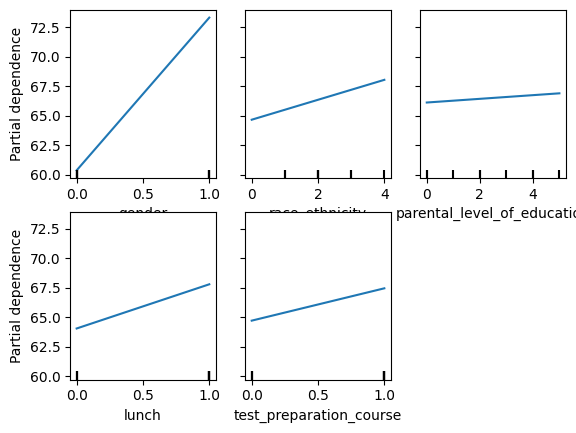

In [30]:
from sklearn.inspection import PartialDependenceDisplay

features = [0,1,2,3,4]  # feature indices or names
disp = PartialDependenceDisplay.from_estimator(model, X_train, features, grid_resolution=1500)
plt.show()

The Partial Dependence Plots provide a visual representation of the relationships between various categorical features and the predicted math scores. The features visualized are 'gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', and 'test_preparation_course'.

- **Gender**: The plot indicates a positive correlation with the math scores. It suggests that one gender, corresponding to the encoded value of 1, tends to have higher predicted math scores than the other.
- **Race/Ethnicity**: This plot shows varying levels of partial dependence, implying that different race/ethnicity groups may have different average predicted math scores.
- **Parental Level of Education**: The plot appears relatively flat, suggesting that this feature has a less pronounced impact on the model’s predictions for math scores, although there might be some slight variability.
- **Lunch**: There is a noticeable upward trend, indicating that the type of lunch, possibly encoded as standard versus free/reduced, might influence predicted math scores.
- **Test Preparation Course**: This feature also shows a positive trend, suggesting that completing a test preparation course is associated with higher predicted math scores.

These plots emphasize the importance of feature values in predicting math scores and can help identify which characteristics have the most significant impact. It is important to remember that the encoding of categorical variables matters, and the actual meaning behind each numeric value should be referenced back to the original dataset's encoding scheme.

### Explaining Model Predictions Using SHAP Values

SHAP (SHapley Additive exPlanations) offers a powerful approach to explain the output of any machine learning model. It uses game theory to measure the contribution of each feature to the prediction.

In this code segment:
- We first train an XGBoost Regressor model on our training data (`X_train`, `y_train`). The model is commented out because it's assumed to be already trained and stored in the `model` variable.
- Then, we instantiate a `shap.Explainer` with our trained model and the training data.
- SHAP values for the test set (`X_test`) are computed, which quantify the impact of each feature on the model's output.
- Finally, we use `shap.plots.waterfall` to visualize the SHAP values of the third prediction from the test set. This visualization will show the contribution of each feature to that specific prediction, helping to understand why the model made that decision.

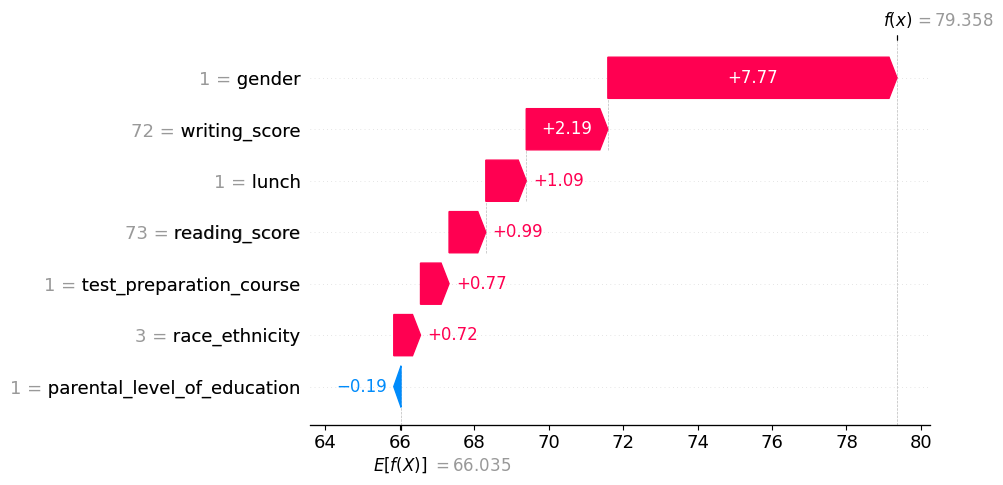

In [31]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[2])

The SHAP waterfall plot visualizes the contribution of each feature to a specific prediction made by the model. Here's an interpretation of the plot for a single prediction:

- The base value, `E[f(X)]`, is the average model output over the training dataset, set at approximately 66.035. This represents the prediction that would be made without any specific information about the current instance.
- Moving from the base value to the final model output, `f(x) = 79.358`, each feature either pushes the prediction higher or lower.
- **Gender** (`1`), **Lunch** (`1`), **Reading Score** (`73`), **Test Preparation Course** (`1`), and **Race Ethnicity** (`3`) all positively contribute to the prediction, pushing the expected math score higher. The **Writing Score** (`72`) has the most substantial positive impact, increasing the predicted value by approximately 7.77 points.
- Conversely, the **Parental Level of Education** (`1`) slightly decreases the prediction by about 0.19 points.

### Generating a SHAP Summary Plot

To further our understanding of model explanations across the entire dataset, we employ a SHAP summary plot. Unlike the waterfall plot which explains individual predictions, the summary plot provides a birds-eye view of the impact of each feature on all the predictions made by the model.


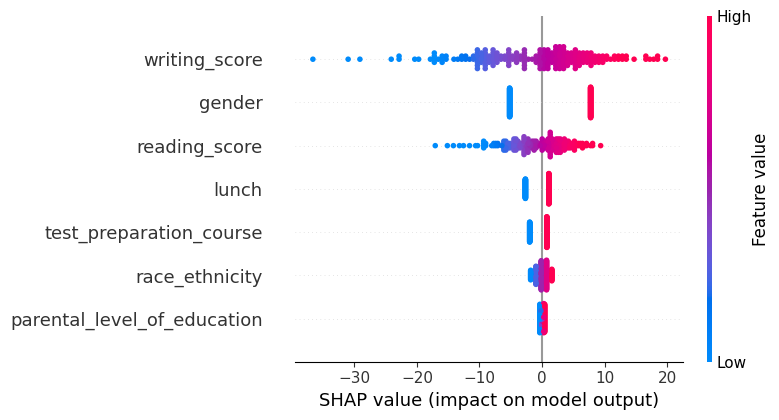

In [32]:
shap.summary_plot(shap_values, X_test)

- **Features List**: The y-axis lists the features used by the model, ranked by their importance. The top feature has the most significant impact on the model's output.

- **SHAP Value Impact**: The x-axis shows the SHAP values. A SHAP value can be positive, which increases the prediction, or negative, which decreases it. The further a dot is from the center (zero line), the stronger its impact on the model's output.

- **Color Coding**: Dots are colored based on the value of the feature: pink for high values and blue for low values. This indicates the direction of the feature's effect.
For example, high values of 'writing_score' (pink) increase the prediction, while low values (blue) decrease it.

- **Dot Density**: The clustering of dots along the x-axis signifies how often a particular SHAP value occurs. A dense cluster means many data points have a similar effect on the prediction.

- **Vertical Spread**: Vertical dispersion of dots for a feature shows the variability of the SHAP values. Wide vertical dispersion indicates that the feature's impact on the prediction changes depending on other features.


## References

1. Jikadara, B. (2024). *Student study performance* [Data set]. Kaggle. Updated 2 months ago. Available from https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance

2. OpenAI. (n.d.). *ChatGPT*. https://www.openai.com/chatgpt


MIT License

Copyright (c) 2024 Ram

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.